<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_02_Arboles/02_B_Preparando_Datos_para_%C3%81rboles_de_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRO: Árboles de Decisión
Explicación de cómo preparar los datos para un modelo de árboles de decisión.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1kiEbdMHy7Ji02SlTxzq913bZ-rcQWn00Td0K_MNVXEk/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_02_Arboles/02_A_%C3%81rboles_Clasificaci%C3%B3n_M%C3%BAltiple_Resuelto.ipynb)




## 0101 Qué es un árbol de decisión?
Un tipo de algoritmo de aprendizaje supervisado que se basa en realizar particiones a partir de distintos niveles de las variables disponibles.

Los árboles de decisión de scikit learn requiren:


*   Que no haya nulos entre las variables
*   Que todas las variables sean numéricas (hay que dumificar las categóricas)



## 0102 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)): pandas, numpy, seaborn, matplotlib.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

## 0103 Carga el dataset: notas alumnos portugueses
Para probar a transformar datos para entrenar árboles de decisión el dataset sobre las notas finales de ciertos estudiantes portugueses de dos instituos en función de ciertas características socio-demográficas. El dataset original se puede encontrr en Kaggle ([aquí](https://www.kaggle.com/dipam7/student-grade-prediction)).

Esta vez no accederemos a la versión que yo había limpiado previamente, sino al dataset en su formato original, que podéis encontrar listo para importar en mi github: 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Notas_Estudiantes.csv'. 

Importa este dataset en un dataframe llamado **df**.

In [2]:
# Url archivo raw
url =  'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Notas_Estudiantes.csv'

# Importa csv
df = pd.read_csv(url)

# Visualización primeras filas
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# 02 EDA
Realizaremos un pequeño análisis exploratorio visual para familiarizarnos con el dataset. 

Recuerda que puedes encontrar mis clases sobre análisis exploratorio [aquí](https://github.com/JotaBlanco/TheValley/tree/main/EDA/).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 0201 Ensuciamos con nulos
Para probar cómo arreglar los nulos, vamos a meter primero ciertos nulos en nuestro dataframe.

In [5]:
df.columns[:-3]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [16]:
df_2 = df.copy(deep=True)

prop_nulos = 0.05
for col in df.columns[:-3]:
  indice_para_nulos = df_2.sample(frac=prop_nulos, replace=False).index
  df_2.loc[indice_para_nulos,col] = np.NaN

df_2.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,NaN,1.0,1.0,3.0,6.0,5,6,6
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,NaN,yes,yes,no,5.0,3.0,3.0,1.0,1.0,NaN,4.0,5,5,6
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7,8,10
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,NaN,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6,10,10
5,GP,M,16.0,U,LE3,T,NaN,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,NaN,2.0,5.0,10.0,15,15,15
6,GP,M,16.0,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,1.0,1.0,3.0,0.0,12,12,11
7,GP,F,17.0,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,NaN,1.0,1.0,1.0,6.0,6,5,6
8,GP,M,15.0,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,2.0,2.0,1.0,1.0,1.0,0.0,16,18,19
9,GP,M,15.0,U,GT3,T,3.0,4.0,other,other,home,mother,1.0,2.0,NaN,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,1.0,1.0,5.0,0.0,14,15,15


In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      375 non-null    object 
 1   sex         375 non-null    object 
 2   age         375 non-null    float64
 3   address     375 non-null    object 
 4   famsize     375 non-null    object 
 5   Pstatus     375 non-null    object 
 6   Medu        375 non-null    float64
 7   Fedu        375 non-null    float64
 8   Mjob        375 non-null    object 
 9   Fjob        375 non-null    object 
 10  reason      375 non-null    object 
 11  guardian    375 non-null    object 
 12  traveltime  375 non-null    float64
 13  studytime   375 non-null    float64
 14  failures    375 non-null    float64
 15  schoolsup   375 non-null    object 
 16  famsup      375 non-null    object 
 17  paid        375 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     375 non-null    o

## 0202 Continuamos con el EDA

In [18]:
df_2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,395.000000,395.000000,395.000000
mean,16.706667,2.762667,2.530667,1.442667,2.024000,0.344000,3.960000,3.237333,3.125333,1.477333,2.298667,3.576000,5.738667,10.908861,10.713924,10.415190
std,1.283100,1.086964,1.073997,0.698580,0.835035,0.746872,0.868954,1.005170,1.119957,0.897944,1.279778,1.381296,8.099381,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


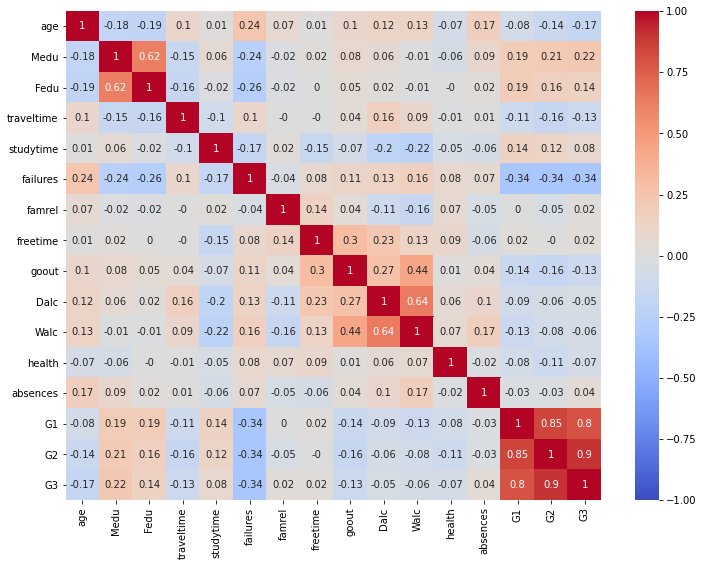

In [19]:
# Visualización coeficientes Pearson
plt.figure(figsize=(12,9))
sns.heatmap(np.round(df_2.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

# 03 Preparación de datos para árbol de decisión
Los árboles de decisión de scikit learn requiren:

*   Que no haya nulos entre las variables
*   Que todas las variables sean numéricas (hay que dumificar las categóricas)


## 0301 Inicialización de árbol
Recordemos cómo entrenar un árbol cuando las variables son numéricas (G2 y G3).

In [80]:
X = df_2[['G1','G2']]
y = df_2['G3']

display(len(X))
display(X.isna().sum())

395

G1    0
G2    0
dtype: int64

In [81]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

2.008248827396522

In [82]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, 
                                 feature_names=list(X.columns))
print(esquema_print)

|--- G2 <= 10.50
|   |--- G2 <= 6.50
|   |   |--- G2 <= 4.50
|   |   |   |--- value: [0.00]
|   |   |--- G2 >  4.50
|   |   |   |--- value: [4.00]
|   |--- G2 >  6.50
|   |   |--- G2 <= 9.50
|   |   |   |--- value: [7.50]
|   |   |--- G2 >  9.50
|   |   |   |--- value: [9.78]
|--- G2 >  10.50
|   |--- G2 <= 13.50
|   |   |--- G2 <= 12.50
|   |   |   |--- value: [11.47]
|   |   |--- G2 >  12.50
|   |   |   |--- value: [13.11]
|   |--- G2 >  13.50
|   |   |--- G2 <= 16.50
|   |   |   |--- value: [15.06]
|   |   |--- G2 >  16.50
|   |   |   |--- value: [18.20]



## 0301 Limpieza de nulos

### 030101 Qué pasa cuando hay nulos en los datos

In [83]:
df_2[['absences','G1', 'G2', 'G3']].head()

,absences,G1,G2,G3
0,6.0,5,6,6
1,4.0,5,5,6
2,10.0,7,8,10
3,2.0,15,14,15
4,4.0,6,10,10


In [84]:
X = df_2[['absences','G1','G2']]
y = df_2['G3']

display(len(X))
display(X.isna().sum())

395

absences    20
G1           0
G2           0
dtype: int64

In [85]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

ValueError: ignored

### 030202 Eliminando nulos
Con el método .[dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [86]:
X = df_2.dropna(subset=['absences'])[['absences','G1','G2']]
y = df_2.dropna(subset=['absences'])['G3']

display(len(X))
display(X.isna().sum())

375

absences    0
G1          0
G2          0
dtype: int64

In [87]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

1.7183913469166894

In [88]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, 
                                 feature_names=list(X.columns))
print(esquema_print)

|--- G2 <= 10.50
|   |--- absences <= 1.00
|   |   |--- G2 <= 6.50
|   |   |   |--- value: [0.00]
|   |   |--- G2 >  6.50
|   |   |   |--- value: [5.39]
|   |--- absences >  1.00
|   |   |--- G2 <= 7.50
|   |   |   |--- value: [6.39]
|   |   |--- G2 >  7.50
|   |   |   |--- value: [9.41]
|--- G2 >  10.50
|   |--- G2 <= 13.50
|   |   |--- G2 <= 12.50
|   |   |   |--- value: [11.49]
|   |   |--- G2 >  12.50
|   |   |   |--- value: [13.06]
|   |--- G2 >  13.50
|   |   |--- G2 <= 16.50
|   |   |   |--- value: [15.04]
|   |   |--- G2 >  16.50
|   |   |   |--- value: [18.26]



**Problemas de este enfoque**

Eliminando filas tenemos varios problemas: 
*   Perdemos información al perder filas

Sí, nuestra variable estaba a nulo en la filas que hemos eliminado, pero quizás había información útil en el resto de variables que también nos estamos perdiendo.
*   No hemos resuelto el problema de los nulos


Cuando queramos hacer predicciones sobre datos nuevos que contengan nulos tendremos igualmente que desarrollar un método para tratarlos si queremos producir una predicción.



### 030103 Rellenando nulos
Usando el método .[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).

#### Rellenando con 0s

In [89]:
X = df_2.loc[:,['absences','G1','G2']]
X['absences'] = X['absences'].fillna(0)
y = df_2['G3']

display(len(X))
display(X.isna().sum())

395

absences    0
G1          0
G2          0
dtype: int64

In [90]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

1.794111316883986

In [91]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, 
                                 feature_names=list(X.columns))
print(esquema_print)

|--- G2 <= 10.50
|   |--- G2 <= 6.50
|   |   |--- absences <= 1.00
|   |   |   |--- value: [0.29]
|   |   |--- absences >  1.00
|   |   |   |--- value: [5.74]
|   |--- G2 >  6.50
|   |   |--- absences <= 1.00
|   |   |   |--- value: [5.86]
|   |   |--- absences >  1.00
|   |   |   |--- value: [9.13]
|--- G2 >  10.50
|   |--- G2 <= 13.50
|   |   |--- G2 <= 12.50
|   |   |   |--- value: [11.47]
|   |   |--- G2 >  12.50
|   |   |   |--- value: [13.11]
|   |--- G2 >  13.50
|   |   |--- G2 <= 16.50
|   |   |   |--- value: [15.06]
|   |   |--- G2 >  16.50
|   |   |   |--- value: [18.20]



#### Rellenando con mediana

In [95]:
X = df_2.loc[:,['absences','G1','G2']]
X['absences'] = X['absences'].fillna(X['absences'].median())
y = df_2['G3']

display(len(X))
display(X.isna().sum())

395

absences    0
G1          0
G2          0
dtype: int64

In [96]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

1.753722911526829

In [97]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, 
                                 feature_names=list(X.columns))
print(esquema_print)

|--- G2 <= 10.50
|   |--- absences <= 1.00
|   |   |--- G2 <= 6.50
|   |   |   |--- value: [0.00]
|   |   |--- G2 >  6.50
|   |   |   |--- value: [5.39]
|   |--- absences >  1.00
|   |   |--- G2 <= 7.50
|   |   |   |--- value: [6.06]
|   |   |--- G2 >  7.50
|   |   |   |--- value: [9.36]
|--- G2 >  10.50
|   |--- G2 <= 13.50
|   |   |--- G2 <= 12.50
|   |   |   |--- value: [11.47]
|   |   |--- G2 >  12.50
|   |   |   |--- value: [13.11]
|   |--- G2 >  13.50
|   |   |--- G2 <= 16.50
|   |   |   |--- value: [15.06]
|   |   |--- G2 >  16.50
|   |   |   |--- value: [18.20]



#### Reflexión sobre estos dos últimos árboles
Los dos son iguales! 

Pero el método de relleno de nulos para "absences" provocaba que esos 20 alumnos acabaran a un lado o a otro de la segunda partición en la rama G2<=10.5.

El método de relleno va a influír en dónde caen las filas con nulos cuando hay una partición, por eso es importante y deberá seguir una lógica lo más realista posible.

### 030104 EJERCICIO
Queremos hacer un árbol que prediga la nota 'G3' con las variables ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'].

Estas variables tienen nulos. Haz 3 modelos:


1.   Un modelo eliminando los nulos
2.   Un modelo rellenando los nulos con 0s
3.   Un modelo rellenando los nulos con un método un poco más avanzado, de tu elección.



In [203]:
df_2[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']].head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,NaN,1.0,1.0,3.0,6.0
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,1.0,NaN,4.0
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,3.0,3.0,10.0
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0
4,NaN,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0


#### Modelo 1
Eliminando los nulos

In [210]:
# Genera las variables X e Y
cols =  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
         'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

X = df_2.dropna(subset=cols)[cols]
y = df_2.dropna(subset=cols)['G3']

# Visualiza la longitud y el número de nulos
display(len(X))
display(X.isna().sum())

198

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64

In [211]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

3.743380387193308

In [212]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, 
                                 feature_names=list(X.columns))
print(esquema_print)

|--- absences <= 1.00
|   |--- failures <= 0.50
|   |   |--- goout <= 2.50
|   |   |   |--- value: [11.82]
|   |   |--- goout >  2.50
|   |   |   |--- value: [7.68]
|   |--- failures >  0.50
|   |   |--- failures <= 1.50
|   |   |   |--- value: [5.00]
|   |   |--- failures >  1.50
|   |   |   |--- value: [0.00]
|--- absences >  1.00
|   |--- Walc <= 1.50
|   |   |--- famrel <= 4.50
|   |   |   |--- value: [11.60]
|   |   |--- famrel >  4.50
|   |   |   |--- value: [14.33]
|   |--- Walc >  1.50
|   |   |--- Fedu <= 3.50
|   |   |   |--- value: [10.36]
|   |   |--- Fedu >  3.50
|   |   |   |--- value: [12.04]



#### Modelo 2
Rellenamos los nulos con 0s.

In [221]:
# Genera las variables X e Y
cols =  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
         'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
X = df_2.loc[:, cols]
X[cols] = X[cols].fillna(0)
y = df_2['G3']

# Visualiza la longitud y el número de nulos
display(len(X))
display(X.isna().sum())

395

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64

In [222]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=4)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

3.567649096404161

In [223]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, 
                                 feature_names=list(X.columns))
print(esquema_print)

|--- failures <= 0.50
|   |--- absences <= 0.50
|   |   |--- goout <= 3.50
|   |   |   |--- traveltime <= 2.50
|   |   |   |   |--- value: [11.70]
|   |   |   |--- traveltime >  2.50
|   |   |   |   |--- value: [3.33]
|   |   |--- goout >  3.50
|   |   |   |--- traveltime <= 1.50
|   |   |   |   |--- value: [8.75]
|   |   |   |--- traveltime >  1.50
|   |   |   |   |--- value: [2.86]
|   |--- absences >  0.50
|   |   |--- age <= 16.50
|   |   |   |--- Medu <= 3.50
|   |   |   |   |--- value: [11.31]
|   |   |   |--- Medu >  3.50
|   |   |   |   |--- value: [13.82]
|   |   |--- age >  16.50
|   |   |   |--- traveltime <= 1.50
|   |   |   |   |--- value: [11.49]
|   |   |   |--- traveltime >  1.50
|   |   |   |   |--- value: [10.44]
|--- failures >  0.50
|   |--- absences <= 1.00
|   |   |--- freetime <= 3.50
|   |   |   |--- famrel <= 4.50
|   |   |   |   |--- value: [0.71]
|   |   |   |--- famrel >  4.50
|   |   |   |   |--- value: [4.67]
|   |   |--- freetime >  3.50
|   |   |   |--- 

#### Modelo 3
Rellenamos los nulos.

In [224]:
# Genera las variables X e Y
cols =  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
         'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
X = df_2.loc[:, cols]
for col in cols:
  X[col] = X[col].fillna(X[col].mean())
y = df_2['G3']

In [225]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=4)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

3.6308338773037274

In [226]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, 
                                 feature_names=list(X.columns))
print(esquema_print)

|--- failures <= 0.67
|   |--- absences <= 0.50
|   |   |--- goout <= 4.50
|   |   |   |--- traveltime <= 2.50
|   |   |   |   |--- value: [10.85]
|   |   |   |--- traveltime >  2.50
|   |   |   |   |--- value: [3.33]
|   |   |--- goout >  4.50
|   |   |   |--- Medu <= 2.88
|   |   |   |   |--- value: [0.00]
|   |   |   |--- Medu >  2.88
|   |   |   |   |--- value: [7.25]
|   |--- absences >  0.50
|   |   |--- age <= 16.35
|   |   |   |--- Medu <= 3.50
|   |   |   |   |--- value: [11.41]
|   |   |   |--- Medu >  3.50
|   |   |   |   |--- value: [13.57]
|   |   |--- age >  16.35
|   |   |   |--- traveltime <= 1.72
|   |   |   |   |--- value: [11.66]
|   |   |   |--- traveltime >  1.72
|   |   |   |   |--- value: [10.17]
|--- failures >  0.67
|   |--- absences <= 1.00
|   |   |--- freetime <= 4.50
|   |   |   |--- Walc <= 2.65
|   |   |   |   |--- value: [0.67]
|   |   |   |--- Walc >  2.65
|   |   |   |   |--- value: [4.00]
|   |   |--- freetime >  4.50
|   |   |   |--- health <= 3.50
|

## 0302 Dumificación vars categóricas

### 030201 Qué pasa cuando hay vars categóricas

In [248]:
df_2[['school', 'sex', 'Mjob', 'G3']].head()

,school,sex,Mjob,G3
0,GP,F,at_home,6
1,GP,F,at_home,6
2,GP,F,at_home,10
3,GP,F,health,15
4,GP,F,other,10


In [249]:
X = df_2[['school','sex', 'Mjob']]
y = df_2['G3']

display(len(X))
display(X.isna().sum())

395

school    20
sex       20
Mjob      20
dtype: int64

In [250]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

ValueError: ignored

### 030202 Dumificación
Utilizando la función [.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [251]:
X.head()

,school,sex,Mjob
0,GP,F,at_home
1,GP,F,at_home
2,GP,F,at_home
3,GP,F,health
4,GP,F,other


In [253]:
pd.get_dummies(X, prefix_sep='_').head()

,school_GP,school_MS,sex_F,sex_M,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,1,0,1,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,0
2,1,0,1,0,1,0,0,0,0
3,1,0,1,0,0,1,0,0,0
4,1,0,1,0,0,0,1,0,0


In [254]:
pd.get_dummies(X, prefix_sep='__', dummy_na=True).head()

,school__GP,school__MS,school__nan,sex__F,sex__M,sex__nan,Mjob__at_home,Mjob__health,Mjob__other,Mjob__services,Mjob__teacher,Mjob__nan
0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,1,0,0,0


In [255]:
pd.get_dummies(X, prefix_sep='_', drop_first=True).head()

,school_MS,sex_M,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0


In [256]:
pd.get_dummies(X, prefix_sep='_', drop_first=True, columns=['school']).head()

,sex,Mjob,school_MS
0,F,at_home,0
1,F,at_home,0
2,F,at_home,0
3,F,health,0
4,F,other,0


In [258]:
X = pd.get_dummies(df_2[['school','sex', 'Mjob']], 
                   prefix_sep='_', 
                   drop_first=True)
y = df_2['G3']

display(len(X))
display(X.isna().sum())

395

school_MS        0
sex_M            0
Mjob_health      0
Mjob_other       0
Mjob_services    0
Mjob_teacher     0
dtype: int64

In [260]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=4)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

4.445265525187396

In [261]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, 
                                 feature_names=list(X.columns))
print(esquema_print)

|--- Mjob_health <= 0.50
|   |--- sex_M <= 0.50
|   |   |--- Mjob_services <= 0.50
|   |   |   |--- school_MS <= 0.50
|   |   |   |   |--- value: [9.32]
|   |   |   |--- school_MS >  0.50
|   |   |   |   |--- value: [10.22]
|   |   |--- Mjob_services >  0.50
|   |   |   |--- school_MS <= 0.50
|   |   |   |   |--- value: [10.86]
|   |   |   |--- school_MS >  0.50
|   |   |   |   |--- value: [7.80]
|   |--- sex_M >  0.50
|   |   |--- school_MS <= 0.50
|   |   |   |--- Mjob_services <= 0.50
|   |   |   |   |--- value: [10.92]
|   |   |   |--- Mjob_services >  0.50
|   |   |   |   |--- value: [11.42]
|   |   |--- school_MS >  0.50
|   |   |   |--- Mjob_other <= 0.50
|   |   |   |   |--- value: [11.36]
|   |   |   |--- Mjob_other >  0.50
|   |   |   |   |--- value: [7.44]
|--- Mjob_health >  0.50
|   |--- school_MS <= 0.50
|   |   |--- sex_M <= 0.50
|   |   |   |--- value: [11.79]
|   |   |--- sex_M >  0.50
|   |   |   |--- value: [12.38]
|   |--- school_MS >  0.50
|   |   |--- sex_M <= 0.5

# 04 Ejercicio
Utilizando df_2 (la versión del dataset con nulos), crea un modelo que prediga 'G3' utilizando las variables predictivas:

['school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'health', 'absences']



In [272]:
df_2[['school',  'Mjob', 'age']].head()

,school,Mjob,age
0,GP,at_home,18.0
1,GP,at_home,17.0
2,GP,at_home,15.0
3,GP,health,15.0
4,GP,other,NaN


In [273]:
# Fíjate en lo que hace esto:
pd.get_dummies(df_2[['school',  'Mjob', 'age']], 
               prefix_sep='_', 
               drop_first=True, 
               columns=['school', 'Mjob'])

,age,school_MS,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,18.0,0,0,0,0,0
1,17.0,0,0,0,0,0
2,15.0,0,0,0,0,0
3,15.0,0,1,0,0,0
4,NaN,0,0,1,0,0
...,...,...,...,...,...,...
390,20.0,1,0,0,1,0
391,17.0,1,0,0,1,0
392,21.0,1,0,1,0,0
393,18.0,1,0,0,1,0


In [274]:
# cols
cols = ['school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 
        'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'health', 
        'absences']
df_2[cols].head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,health,absences
0,GP,F,18.0,GT3,A,4.0,4.0,at_home,teacher,2.0,0.0,yes,3.0,6.0
1,GP,F,17.0,GT3,T,1.0,1.0,at_home,other,2.0,0.0,no,NaN,4.0
2,GP,F,15.0,LE3,T,1.0,1.0,at_home,other,2.0,3.0,yes,3.0,10.0
3,GP,F,15.0,GT3,T,4.0,2.0,health,services,3.0,0.0,no,5.0,2.0
4,GP,F,NaN,GT3,T,3.0,3.0,other,other,2.0,0.0,NaN,5.0,4.0


In [275]:
# Dumifica las variables categóricas
X = pd.get_dummies(df_2[cols], 
                   prefix_sep='_', 
                   drop_first=True, 
                   columns=['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 
                            'Fjob', 'schoolsup'])
y = df_2['G3']

display(len(X))
display(X.isna().sum())

395

age              20
Medu             20
Fedu             20
studytime        20
failures         20
health           20
absences         20
school_MS         0
sex_M             0
famsize_LE3       0
Pstatus_T         0
Mjob_health       0
Mjob_other        0
Mjob_services     0
Mjob_teacher      0
Fjob_health       0
Fjob_other        0
Fjob_services     0
Fjob_teacher      0
schoolsup_yes     0
dtype: int64

In [278]:
# Limpiamos los nulos
for col in X.columns:
  X[col] = X[col].fillna(X[col].mean())

display(len(X))
display(X.isna().sum())

395

age              0
Medu             0
Fedu             0
studytime        0
failures         0
health           0
absences         0
school_MS        0
sex_M            0
famsize_LE3      0
Pstatus_T        0
Mjob_health      0
Mjob_other       0
Mjob_services    0
Mjob_teacher     0
Fjob_health      0
Fjob_other       0
Fjob_services    0
Fjob_teacher     0
schoolsup_yes    0
dtype: int64

In [279]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=4)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

3.6109649196075644

In [280]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, 
                                 feature_names=list(X.columns))
print(esquema_print)

|--- failures <= 0.67
|   |--- sex_M <= 0.50
|   |   |--- absences <= 0.50
|   |   |   |--- Pstatus_T <= 0.50
|   |   |   |   |--- value: [14.00]
|   |   |   |--- Pstatus_T >  0.50
|   |   |   |   |--- value: [8.64]
|   |   |--- absences >  0.50
|   |   |   |--- Mjob_services <= 0.50
|   |   |   |   |--- value: [10.56]
|   |   |   |--- Mjob_services >  0.50
|   |   |   |   |--- value: [12.77]
|   |--- sex_M >  0.50
|   |   |--- age <= 16.35
|   |   |   |--- schoolsup_yes <= 0.50
|   |   |   |   |--- value: [13.48]
|   |   |   |--- schoolsup_yes >  0.50
|   |   |   |   |--- value: [8.43]
|   |   |--- age >  16.35
|   |   |   |--- health <= 2.50
|   |   |   |   |--- value: [12.62]
|   |   |   |--- health >  2.50
|   |   |   |   |--- value: [10.51]
|--- failures >  0.67
|   |--- absences <= 1.00
|   |   |--- Mjob_services <= 0.50
|   |   |   |--- age <= 18.50
|   |   |   |   |--- value: [0.00]
|   |   |   |--- age >  18.50
|   |   |   |   |--- value: [6.00]
|   |   |--- Mjob_services >  0